In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import datetime, re

https://www.kaggle.com/datasets/vanviethieuanh/vietnam-house-rent-dataset?select=hcm.csv

# Import Data

In [115]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/ML_House_Rent/'
df = pd.read_csv(path + 'hcm/hcm.csv')
# df = df[['price', 'published','acreage', 'address']]
df

,title,price,published,acreage,address
0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2.2,16/05/2022,20.0,"Lê Đình Cẩn, Phường Tân Tạo, Quận Bình Tân, Hồ..."
1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2.5,20/04/2022,20.0,"487/35/25 Đường Huỳnh Tấn Phát, Phường Tân Thu..."
2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3.5,10/05/2022,30.0,"Đường 10, Phường Tân Thuận Đông, Quận 7, Hồ Ch..."
3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1.5,05/05/2022,30.0,"283/15 Huỳnh Tấn Phát, Phường Tân Thuận Đông, ..."
4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3.5,05/01/2022,18.0,"Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh"
...,...,...,...,...,...
9728,Cho thuê phòng trọ gần trung tâm quận 11,2.2,30/10/2020,14.0,"102/9/11a Đường Bình Thới, Phường 14, Quận 11,..."
9729,Cho thuê phòng hoặc tầng 1 và 2 nhà mặt tiền 1...,2.5,23/11/2020,12.0,"177 Đường Tôn Thất Hiệp, Phường 12, Quận 11, H..."
9730,Phòng FULL NOI THAT THOÁNG ĐẸP NHƯ HÌNH GẦN LÊ...,3.5,28/07/2022,20.0,"212 Đường Lò Siêu, Phường 12, Quận 11, Hồ Chí ..."
9731,CHÍNH CHỦ CHO THUÊ CĂN HỘ MINI TẠI TRUNG TÂM Q11,5.0,25/11/2020,30.0,"127/17 Đường Âu Cơ, Phường 14, Quận 11, Hồ Chí..."


# EDA

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      9733 non-null   object 
 1   price      9733 non-null   float64
 2   published  9733 non-null   object 
 3   acreage    9733 non-null   float64
 4   address    9733 non-null   object 
dtypes: float64(2), object(3)
memory usage: 380.3+ KB


In [117]:
df.isnull().sum()

title        0
price        0
published    0
acreage      0
address      0
dtype: int64

In [118]:
df.duplicated().sum()

np.int64(0)

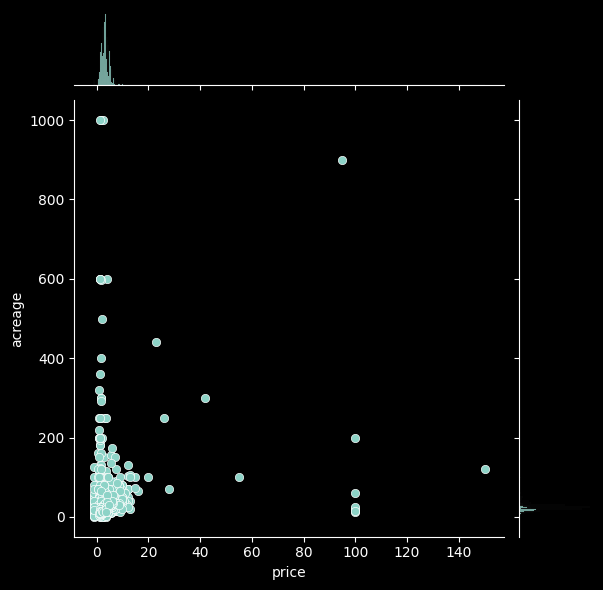

In [119]:
g = sns.JointGrid(df, x='price', y='acreage')
g.plot(sns.scatterplot, sns.histplot)

# Conclude: too many outliners >> need traiter

In [120]:
df[(df.price >=10)].sort_values('price',ascending=False).head()

,title,price,published,acreage,address
1191,Sang 19 căn hộ cần tìm đối tác thiện lành,150.0,29/05/2019,120.0,"Đường Bến Vân Đồn, Phường 6, Quận 4, Hồ Chí Minh"
241,Nhà trọ sạch đẹp rộng rãi giá rẻ [quận8],100.0,29/05/2018,20.0,"2a Đường Lương Văn Can, Phường 15, Quận 8, Hồ ..."
2179,Phòng trọ cho thuê. dọn đến từ ngày 15-30tháng...,100.0,15/03/2016,12.0,"Hẻm 336, nguyễn văn luông, phường 12, quận 6 sg"
1976,"Cho thuê phòng trọ 206 Hưng Phú, Quận 8",100.0,28/09/2016,25.0,"Hưng Phú, Phường 8, Quận 8, Hồ Chí Minh"
6090,Sang nhượng gấp dãy nhà trọ đang kinh doanh tốt,100.0,15/07/2017,60.0,"Bà Hạt, Phường 6, Quận 10, Hồ Chí Minh"


# Feature Cleaning

## published date

In [121]:
str = '05/05/2022'
int(str[3:5])

5

In [122]:
def extract_date(x):
    try:
        str = x
        day = int(str[0:2])
        month = int(str[3:5])
        year = int(str[6:10])
        date_time = datetime.date(year, month, day)
        return date_time
    except:
        date_time = datetime.date(1111, 1, 1) 
        return date_time

extract_date('05/05/2022')

datetime.date(2022, 5, 5)

In [123]:
df['published_date'] = df.published.apply(lambda x: extract_date(x))
df

,title,price,published,acreage,address,published_date
0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2.2,16/05/2022,20.0,"Lê Đình Cẩn, Phường Tân Tạo, Quận Bình Tân, Hồ...",2022-05-16
1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2.5,20/04/2022,20.0,"487/35/25 Đường Huỳnh Tấn Phát, Phường Tân Thu...",2022-04-20
2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3.5,10/05/2022,30.0,"Đường 10, Phường Tân Thuận Đông, Quận 7, Hồ Ch...",2022-05-10
3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1.5,05/05/2022,30.0,"283/15 Huỳnh Tấn Phát, Phường Tân Thuận Đông, ...",2022-05-05
4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3.5,05/01/2022,18.0,"Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh",2022-01-05
...,...,...,...,...,...,...
9728,Cho thuê phòng trọ gần trung tâm quận 11,2.2,30/10/2020,14.0,"102/9/11a Đường Bình Thới, Phường 14, Quận 11,...",2020-10-30
9729,Cho thuê phòng hoặc tầng 1 và 2 nhà mặt tiền 1...,2.5,23/11/2020,12.0,"177 Đường Tôn Thất Hiệp, Phường 12, Quận 11, H...",2020-11-23
9730,Phòng FULL NOI THAT THOÁNG ĐẸP NHƯ HÌNH GẦN LÊ...,3.5,28/07/2022,20.0,"212 Đường Lò Siêu, Phường 12, Quận 11, Hồ Chí ...",2022-07-28
9731,CHÍNH CHỦ CHO THUÊ CĂN HỘ MINI TẠI TRUNG TÂM Q11,5.0,25/11/2020,30.0,"127/17 Đường Âu Cơ, Phường 14, Quận 11, Hồ Chí...",2020-11-25


## Remove rows

In [124]:
print(len(df))
print(len(df[df.price <= 0])) #price = -1
print(len(df[(df.published_date <= datetime.date(1111, 1, 1) )])) #no date
print(len(df[df.acreage==0]) )

9733
64
231
8


In [125]:
# remove rows with unknown published dates
# remove price = -1
print('rows with negotiable price', len(df[df.price <= 0]) )
# df1 = df[~(df.published_date <= datetime.date(1111, 1, 1) )]
df1 = df[~(df.price <= 0)]
df1 = df1[~(df1.acreage==0)]
print(df1.shape)


rows with negotiable price 64
(9662, 6)


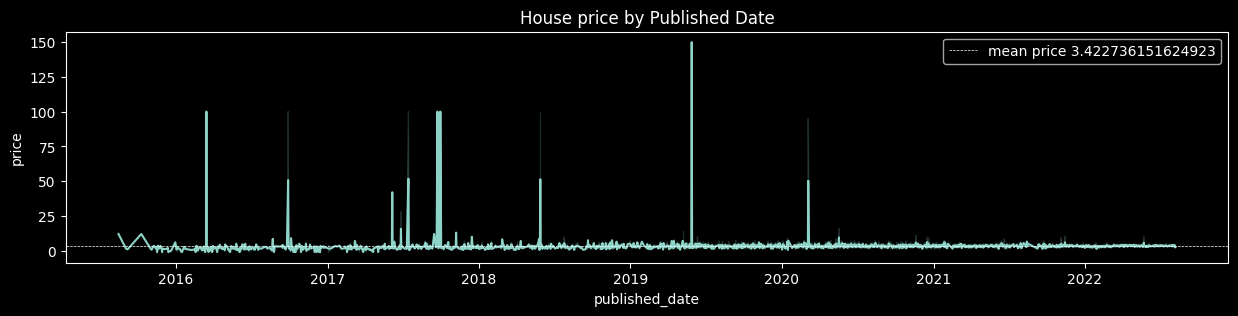

In [126]:
mean_price = np.mean(df1['price'])
plt.figure(figsize=(15,3))
ax =sns.lineplot(df[~(df.published_date <= datetime.date(1111, 1, 1) )], x='published_date', y ='price')
ax.axhline(mean_price, label = f'mean price {mean_price}', ls='--', lw=0.5)
plt.title('House price by Published Date')
plt.legend()
plt.show()

# Conclude: too much outliner


## Get District

In [127]:
df1.address.head(20)

0     Lê Đình Cẩn, Phường Tân Tạo, Quận Bình Tân, Hồ...
1     487/35/25 Đường Huỳnh Tấn Phát, Phường Tân Thu...
2     Đường 10, Phường Tân Thuận Đông, Quận 7, Hồ Ch...
3     283/15 Huỳnh Tấn Phát, Phường Tân Thuận Đông, ...
4     Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh
5     174/15 Đường Đặng Văn Ngữ, Phường 14, Quận Phú...
6     311 Nguyễn Thiện Thuật, Phường 1, Quận 3, Hồ C...
7            Đường số 4, Phường 16, Quận 8, Hồ Chí Minh
8     Phố Nguyễn Thiện Thuật, Phường 1, Quận 3, Hồ C...
9     Đường Đặng Văn Ngữ, Phường 14, Quận Phú Nhuận,...
10          69/4 Phạm Văn Chí, Phường 1, Quận 6, TP.HCM
11    Số 13A Đường Tôn Thất Thuyết, Phường 18, Quận ...
12    B156/20 Đường Nguyễn Thần Hiến, Phường 18, Quậ...
13    424/27 Đường Nguyễn Tất Thành, Phường 18, Quận...
14    13A Đường Tôn Thất Thuyết, Phường 18, Quận 4, ...
15    Đường Nguyễn Tất Thành, Phường 18, Quận 4, Hồ ...
16    667 Đường Đoàn Văn Bơ, Phường 18, Quận 4, Hồ C...
17    Đường Nguyễn Tất Thành, Phường 18, Quận 4,

In [128]:
def contains_number(substring):
    # Define a pattern to match any digit (\d) in the substring
    pattern = r'\d'
    # Search for the pattern in the substring
    match = re.search(pattern, substring)
    # Return True if a match is found (i.e., substring contains a number), otherwise False
    return bool(match)
# Example usage:
# substring1 = "B156/20 Đường Nguyễn Thần Hiến"

def contains_substring(main_string, substring_list):
    for substring in substring_list:
        if substring.lower() in main_string.lower():
            return True
    return False

def capitalize_first_letter(input_string):
    return input_string[:1].upper() + input_string[1:]


In [129]:
str = '43 Bình Minh, Đường Nguyễn Ảnh Thủ, Xã Tân Xuân'
contains_substring(str, ['xã', 'phường'])

True

In [130]:
def split_address_2(x):
    try:
        substr_list = x.split(',')
        street_list = ['đường']
        ward_list = ['xã', 'phường', 'p.']
        district_list = ['quận','huyện', 'q.']
        street = None
        ward = None 
        district =None
        for index, i in enumerate(substr_list):
            i = i.strip().lower()
            # print(i)
            #treat street
            if contains_substring(i, street_list) and index == 0: street = i
            elif contains_number(i) and index ==0: street = i
            # elif index==0 and contains_substring(substr_list[1], ward_list): street=i
            elif index==0 and contains_substring(i,ward_list)==False: street = i
            # else: street = 'Unknown'
            #treat ward
            if contains_substring(i, ward_list): ward = i
            #treat district
            if contains_substring(i, district_list): district = i
            # if street and ward and district: return street, ward, district
        return street, ward, district
    except:
        return None, None, None
    
        

In [131]:
# str = 'Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh' 
# str = 'B156/20 Đường Nguyễn Thần Hiến, Phường 18, Quận 10'
str = 'số 41 - 43, đường 225A, Phường Tân Phú, Quận 9, Hồ Chí Minh'
str = '43 Cư Xá Bắc Hải, Phường 15, Quận 10, Hồ Chí Minh'
str = 'Xã Phước Lộc, Huyện Nhà Bè, Hồ Chí Minh'
str = 'Nguyễn Thị Thập, Phường Tân Thuận Đông, Quận 7'
str = 'Phường Tân Quy, Quận 7, Hồ Chí Minh'
# contains_substring(str, ['xã', 'phường'])
split_address_2(str)

(None, 'phường tân quy', 'quận 7')

In [132]:
df2 = df1.copy(deep=True)
df2[['street','ward', 'district']] = df2.address.apply(lambda x: pd.Series(split_address_2(x)))
df2[160:180]

,title,price,published,acreage,address,published_date,street,ward,district
160,"[CHDV] Nội Thất Tiện Nghi Y Hình,Gần Cầu T.Thuận",3.5,30/12/2021,25.0,"320 Đường Nguyễn Tất Thành, Phường 18, Quận 4,...",2021-12-30,320 đường nguyễn tất thành,phường 18,quận 4
161,"> Homestay KTX Chỉ 1,5 triệu/1 người . Phù hợp...",1.3,05/01/2022,36.0,"300 Nguyễn Tất Thành, Phường 18, Quận 4, Hồ Ch...",2022-01-05,300 nguyễn tất thành,phường 18,quận 4
162,"Phòng Mới Xây, Giá Khuyễn Mãi, Đoàn Văn Bơ Q4",3.5,06/04/2022,25.0,"104/8 Đường Đoàn Văn Bơ, Phường 18, Quận 4, Hồ...",2022-04-06,104/8 đường đoàn văn bơ,phường 18,quận 4
163,Khai Trương Phòng Cao Cấp Full NT Ngay Cầu TÂN...,4.0,16/04/2022,32.0,"Đường Nguyễn Tất Thành, Phường 18, Quận 4, Hồ ...",2022-04-16,đường nguyễn tất thành,phường 18,quận 4
164,NGUYỄN TẤT THÀNH - Phòng Mới Xây - FULL Nội Th...,3.8,22/04/2022,22.0,"Nguyễn Tất Thành, Phường 18, Quận 4, Hồ Chí Minh",2022-04-22,nguyễn tất thành,phường 18,quận 4
165,"Homestay KTX Quận 10 - Q4 - Q1 - chỉ 1,5 triệu...",1.5,15/06/2022,30.0,"300 Đường Nguyễn Tất Thành, Phường 18, Quận 4,...",2022-06-15,300 đường nguyễn tất thành,phường 18,quận 4
166,"Phòng cho thuê tại Quận 4. Rộng rãi, thoáng má...",4.0,05/08/2022,30.0,"Nguyễn Thần Hiến, Phường 18, Quận 4, Hồ Chí Minh",2022-08-05,nguyễn thần hiến,phường 18,quận 4
167,Phòng trọ cho thuê giá rẻ quận 6 gần chợ và nh...,2.5,14/12/2020,20.0,"Đường số 8, Phường 13, Quận 6, Hồ Chí Minh",2020-12-14,đường số 8,phường 13,quận 6
168,Phòng trọ quận 6 khu cư xá phú lâm B,3.2,03/04/2021,25.0,"J22-J23 Cư Xá Phú Lâm B, Phường 13, Quận 6, Hồ...",2021-04-03,j22-j23 cư xá phú lâm b,phường 13,quận 6
169,"Cho thuê phòng mới xây, mặt bằng kinh doanh gầ...",3.3,23/01/2021,24.0,"Đường số 2, Phường 13, Quận 6, Hồ Chí Minh",2021-01-23,đường số 2,phường 13,quận 6


In [133]:
df2['district'] = df2['district'].str.replace('q.', 'quận ')

In [134]:
replace_dict = { 'đường hiệp bình - q.thủ đức' : 'quận thủ đức',
                'đường hiệp bình - quận thủ đức': 'quận thủ đức',
                'quận gò vấp':'quận gò vấp', 'quận thủ đức (gần cầu vượt linh xuân)': 'quận thủ đức',
                'quận 6 sg': 'quận 6', 'quận 05': 'quận 5', 'quận  thủ đức': 'quận thủ đức',
                'p tân tạo quận bình tân': 'quận bình tân', 'huyện hóc mônuyện hóc môn':'huyện hóc môn',
                'huyện củ achi':'huyện củ chi', '1171/40 đường 3/2 phường 6 quận 11': 'quận 11'
}
# 'q.5'.replace('q.','quận ')
df2['district'] =df2['district'].str.replace('q.', 'quận ')
df2['district'] = df2['district'].replace(replace_dict, regex=True)
df2['district'].sort_values(ascending=False).unique()

array(['quận tân phú', 'quận tân bình',
       'quận thủ đức (gần cầu vượt linh xuân)', 'quận thủ đức',
       'quận phú nhuận', 'quận gò vấp', 'quận bình tân',
       'quận bình thạnh', 'quận 9 (có thể đi xe buýt', 'quận 9', 'quận 8',
       'quận 7', 'quận 6', 'quận 5', 'quận 4', 'quận 3', 'quận 2',
       'quận 12', 'quận 11', 'quận 10', 'quận 1', 'huyện nhà bè',
       'huyện hóc môn', 'huyện củ chi', 'huyện bình chánh', None],
      dtype=object)

In [135]:
df3 = df2.copy(deep=True)
print(len(df3[df3.district.isna()]))

45


In [136]:
# remove these rows
list = ['quận thủ đức (gần cầu vượt linh xuân)', 'quận 9 (có thể đi xe buýt']
df3 = df3[~(df3.district.isin(list))]

In [137]:
# remove na
df3 = df3[~df3.district.isna()]
len(df3)

9615

In [138]:
groupbydistrict = df3.groupby('district')['price'].mean().reset_index().sort_values('price', ascending=False)
groupbydistrict['district'].unique()

array(['quận 1', 'quận 3', 'quận phú nhuận', 'quận bình thạnh', 'quận 2',
       'quận 4', 'quận tân bình', 'huyện bình chánh', 'quận 7', 'quận 8',
       'quận 10', 'quận 5', 'quận gò vấp', 'quận tân phú', 'quận 6',
       'quận 11', 'quận 9', 'quận 12', 'quận thủ đức', 'quận bình tân',
       'huyện nhà bè', 'huyện củ chi', 'huyện hóc môn'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

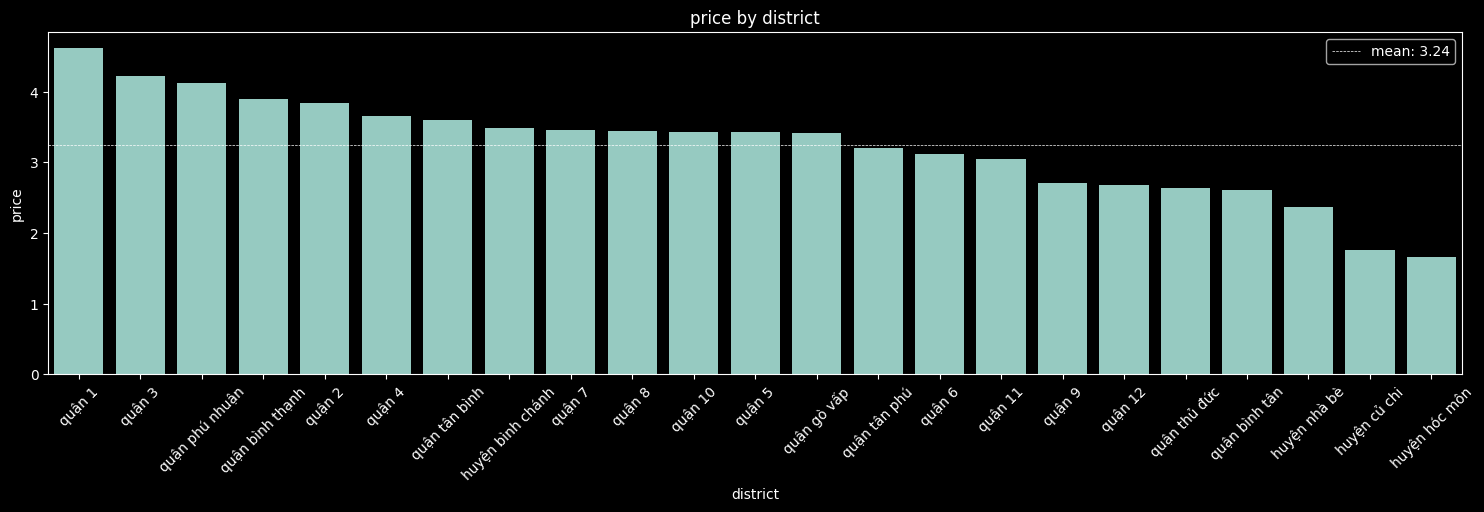

In [139]:
# check mean of price by district
mean_price_district = round(np.mean(groupbydistrict['price']),2)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
ax = sns.barplot(groupbydistrict, x='district', y='price')
ax.axhline(mean_price_district, ls='--', lw=0.5, label=f'mean: {mean_price_district}')
ax.legend()
plt.tight_layout()
plt.title('price by district')
plt.show

# Traiter Outliner

## Add price/acre

In [140]:
df3['price_per_acreage'] = df3['price']/df3['acreage']
# df3['year'] = pd.to_datetime(df3['published_date']).dt.year

In [141]:
df3[(df3.acreage<2)]

,title,price,published,acreage,address,published_date,street,ward,district,price_per_acreage
9434,Cho thuê phòng trọ tại Hóc Môn,1.4,20/12/2019,1.0,"K24, Ấp Mỹ Hòa 2, Xã Xuân Thới Đông, Huyện Hóc...",2019-12-20,k24,xã xuân thới đông,huyện hóc môn,1.4


Text(0.5, 1.0, 'Price per acreage Histogram')

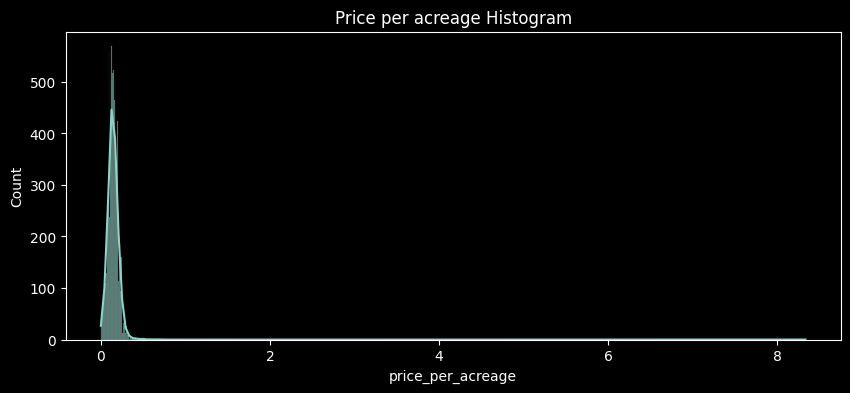

In [219]:
plt.figure(figsize=(10,4))
sns.histplot(df3['price_per_acreage'],kde=True) #[df3.price_per_acreage<=0.3]
plt.title('Price per acreage Histogram')

<Axes: xlabel='price', ylabel='Count'>

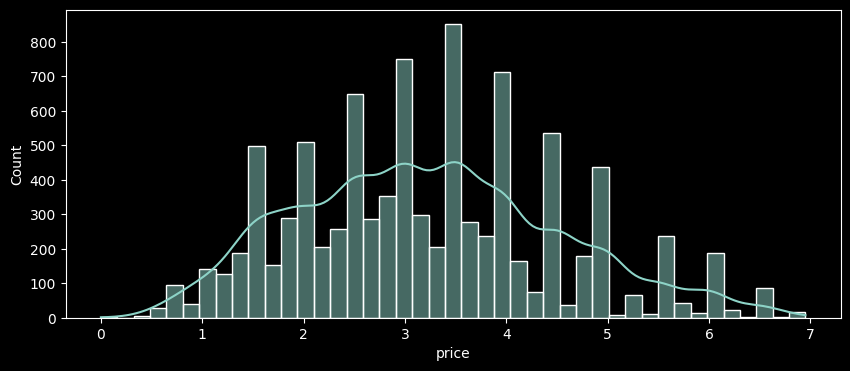

In [99]:
plt.figure(figsize=(10,4))
sns.histplot(df3[(df3.price_per_acreage<=0.3)& (df3.price<7)]['price'],kde=True)

### remove price/acre >0.3 & price >7

In [142]:
df4 = df3[(df3.price_per_acreage<=0.3) & (df3.price<7)]
df4.shape

(9333, 10)

## Acreage Outliner

C:\Users\84393\AppData\Local\Temp\ipykernel_21020\2989413368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['acreage_round'] = round(df4.acreage,0).round().astype(int)


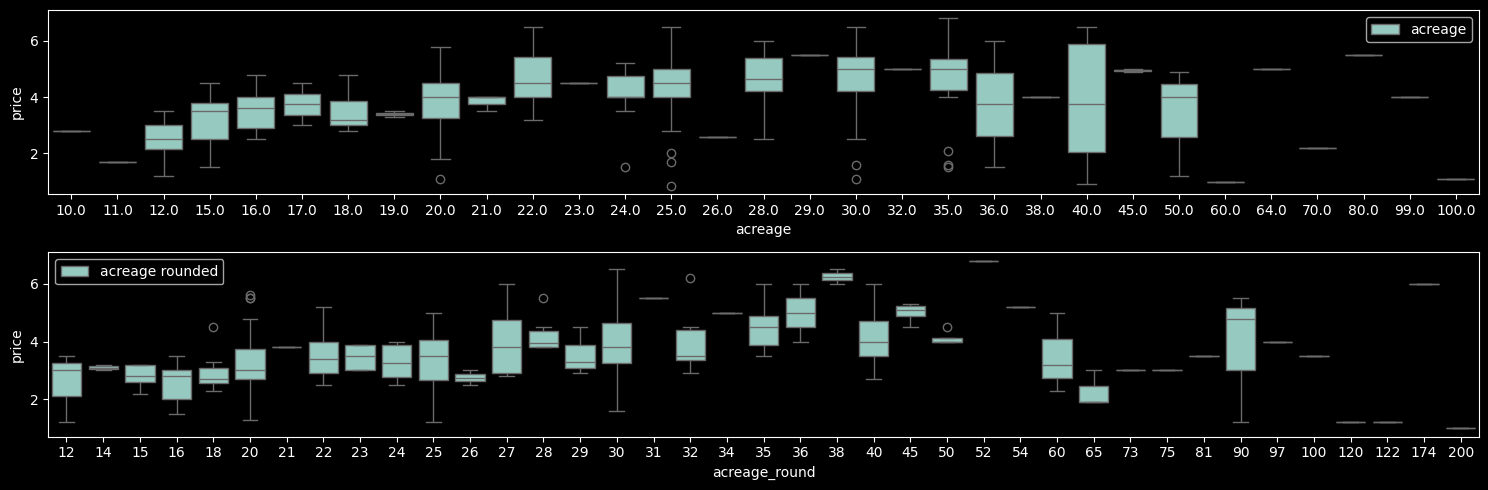

In [143]:
df4['acreage_round'] = round(df4.acreage,0).round().astype(int)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

sns.boxplot(df4[(df4.district=='quận 1')], x='acreage',y='price' , ax=axes[0], label='acreage')
sns.boxplot(df4[(df4.district=='quận 2')&(df4.price<20)], x='acreage_round',y='price', ax=axes[1], label='acreage rounded' )

plt.tight_layout()
plt.show()


### Bins of acreage

[  20.     30.     18.     15.     16.     25.     14.      9.     23.
   24.     19.     13.     28.     45.     12.     40.     35.      8.
   34.     32.     60.     33.     22.     11.     50.    500.     18.8
   73.     36.     17.     80.     26.     68.     21.     27.    100.
  300.     10.     76.     66.     62.     72.     82.     70.     44.
   29.     31.     52.    130.     48.      5.      7.      6.     90.
   65.     74.    180.    360.     38.     37.     13.5    42.     39.
   58.     83.     86.    115.    150.     56.     46.    160.     51.
 1000.     54.      4.     78.     10.6   250.     64.    600.     55.
    5.2   196.     99.    156.    182.     12.5   120.    105.     85.
  598.     75.    161.     41.    110.    200.     18.5    59.     63.
   25.5    49.     79.    400.     98.     43.     24.8   135.     57.
   67.    195.      9.5    31.5    11.5   220.    115.5   116.    320.
  122.     53.     81.     21.5    17.5   174.     97.     16.5     6.5
  29

<Axes: ylabel='Count'>

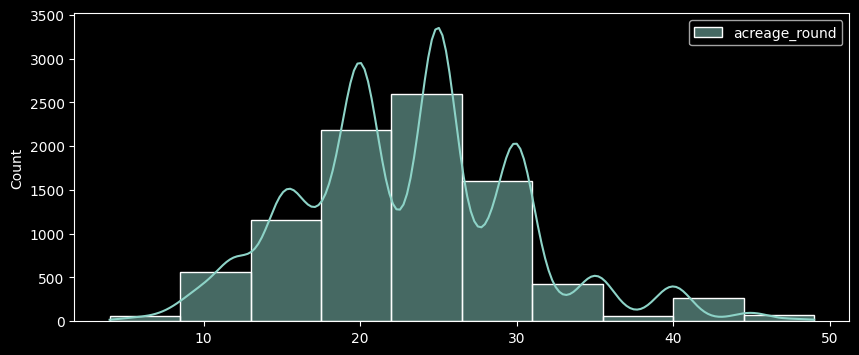

In [144]:
print(df4.acreage.unique())
plt.figure(figsize=(10,4))
sns.histplot(df4[(df4.acreage<50)][['acreage_round']], kde=True, label='histo of acreage', bins=10)

### Remove acreage>50

In [220]:
print(df4[(df4.acreage<70)].shape, df4[(df4.acreage<60)].shape, df4[(df4.acreage<50)].shape)
df5 = df4[(df4.acreage<50)]
df5.shape

(9183, 11) (9110, 11) (8984, 11)


(8984, 11)

In [221]:
# Define number of bins
# Define custom bin ranges and values
def bin_acreage(x):
    bins = np.arange(0,70,2)
    for b in bins:
        x= round(x)
        if x <= b: 
            return b
            break
# Perform equal width binning
# df5['acreage_bin'] = pd.cut(df5['acreage_round'], bins=n_bins, labels=False)
df5['acreage_bin'] = df5.acreage.apply(lambda x: bin_acreage(x))


C:\Users\84393\AppData\Local\Temp\ipykernel_21020\3782999636.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['acreage_bin'] = df5.acreage.apply(lambda x: bin_acreage(x))


[20 30 18 16 26 14 10 24 28 46 12 40 36  8 34 32 22 44 48  6 38 42  4 50]


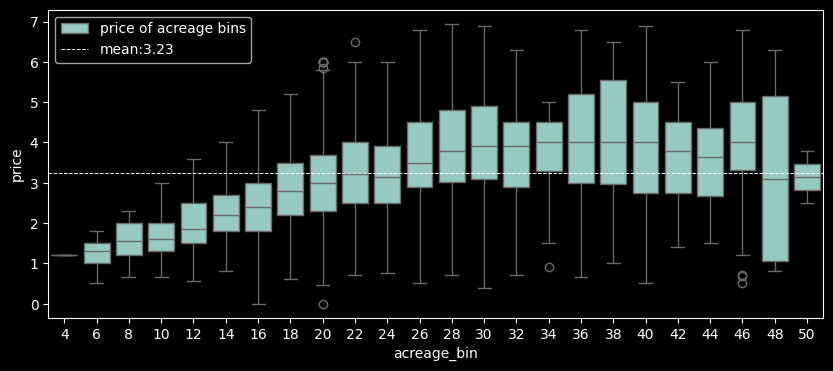

In [222]:
print(df5.acreage_bin.unique())
plt.figure(figsize=(10,4))
meanp = round(np.mean(df5.price),2)
ax=sns.boxplot(df5, x='acreage_bin', y='price', label='price of acreage bins')
ax.axhline(meanp, ls='--', lw=0.7, label = f'mean:{meanp}')
plt.legend()

In [223]:
# check how many rent ads for each district
# to see if we can group the districts
df5.groupby('district').agg('count')

,title,price,published,acreage,address,published_date,street,ward,price_per_acreage,acreage_round,acreage_bin
district,,,,,,,,,,,
huyện bình chánh,125,125,125,125,125,125,105,123,125,125,125
huyện củ chi,22,22,22,22,22,22,20,19,22,22,22
huyện hóc môn,114,114,114,114,114,114,100,114,114,114,114
huyện nhà bè,134,134,134,134,134,134,128,106,134,134,134
quận 1,346,346,346,346,346,346,339,343,346,346,346
quận 10,517,517,517,517,517,517,517,511,517,517,517
quận 11,431,431,431,431,431,431,431,426,431,431,431
quận 12,423,423,423,423,423,423,397,423,423,423,423
quận 2,258,258,258,258,258,258,247,258,258,258,258


## Get IQR per district per acreagebin

In [224]:
df5.groupby(['district','acreage_bin']).price.agg('mean')

district          acreage_bin
huyện bình chánh  12             1.671429
                  14             1.625000
                  16             1.803571
                  18             1.909091
                  20             1.859615
                                   ...   
quận tân phú      34             4.100000
                  36             3.781818
                  40             3.321429
                  46             3.866667
                  50             3.800000
Name: price, Length: 402, dtype: float64

In [225]:
df5.groupby(['district']).price.agg('count')

district
huyện bình chánh    125
huyện củ chi         22
huyện hóc môn       114
huyện nhà bè        134
quận 1              346
quận 10             517
quận 11             431
quận 12             423
quận 2              258
quận 3              513
quận 4              436
quận 5              480
quận 6              295
quận 7              384
quận 8              420
quận 9              405
quận bình thạnh     748
quận bình tân       380
quận gò vấp        606
quận phú nhuận      574
quận thủ đức        376
quận tân bình       568
quận tân phú        429
Name: price, dtype: int64

In [226]:
# remove outliers of price_per_sqft by location
# only take those within -1 to 1 STD

# Groupby Object in pandas is not a df itself. It has groups and you can iterate to access each group
# each subgroup within a groupby object in pandas is itself a DataFrame

def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(['district','acreage_bin']): #key = location_name in the groupby df
        m = np.mean(subdf.price_per_acreage)
        st = np.std(subdf.price_per_acreage)
        reduced_df = subdf[(subdf.price_per_acreage > (m-st)) & (subdf.price_per_acreage <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [227]:
df6 = remove_pps_outlier(df5)

In [154]:
df6[(df6.district=='quận 2')& (df6.price>6)]

,title,price,published,acreage,address,published_date,street,ward,district,price_per_acreage,acreage_round,acreage_bin
1613,"Cho thuê phòng có ban công studio,1phòng ngủ, ...",6.5,08/04/2022,38.0,"Đường số 3, Phường Bình An, Quận 2, Hồ Chí Minh",2022-04-08,đường số 3,phường bình an,quận 2,0.171053,38,38


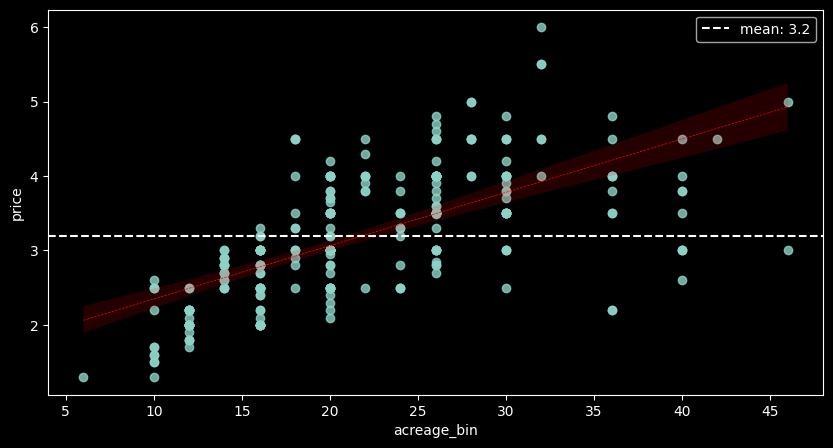

In [228]:
ax = plt.figure(figsize=(10,5))
meanp_d = round(np.mean(df6[(df6.district=='quận 4')]['price']),2)
# sns.lmplot(df6[(df6.district=='quận 2')], y='price', x='acreage_bin', line_kws={'color':'r','ls':'--','lw':0.5},
        #    hue='district', row='district',sharex=False)
ax=sns.regplot(df6[(df6.district=='quận 4')] , y='price', x='acreage_bin', line_kws={'color':'r','ls':'--','lw':0.5})
ax.axhline(meanp_d, ls='--', label=f'mean: {meanp_d}' )
plt.legend()

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [229]:
## label encoding the district
district_list = groupbydistrict['district'].unique()
district_index_dict = {value: index for index, value in enumerate(district_list)}

In [231]:
# Replace using the mapping dictionary in column 'B'
df7 = df6.copy(deep=True)
df7['district_num'] = df7['district'].map(district_index_dict)
df7.head()

,title,price,published,acreage,address,published_date,street,ward,district,price_per_acreage,acreage_round,acreage_bin,district_num
0,CHO THUÊ PHÒNG TRỌ GIÁ RẺ DƯƠNG ĐÌNH CÚC BÌNH ...,1.4,16/02/2021,11.5,"Dương Đình Cúc, Xã Tân Kiên, Huyện Bình Chánh,...",2021-02-16,dương đình cúc,xã tân kiên,huyện bình chánh,0.121739,12,12,7
1,"Cho thuê phòng trọ tại Quốc Lộ 50 Bình Chánh, ...",2.0,07/06/2022,12.0,"Hẻm ĐÌNH BÌNH LỘC Quốc Lộ 50, Xã Hưng Long,...",2022-06-07,hẻm đình bình lộc quốc lộ 50,xã hưng long,huyện bình chánh,0.166667,12,12,7
2,Cho thuê phòng trọ giá rẻ gần bến xe Q8 1tr2/t...,1.2,04/04/2021,12.0,"(Gần bến xe q8) A3/30, Đường số 50, Xã Bình Hư...",2021-04-04,(gần bến xe q8) a3/30,xã bình hưng,huyện bình chánh,0.100000,12,12,7
3,Phòng trọ cho thuê gần chợ Bình Chánh,1.6,16/08/2019,12.0,"D8/30 Đường Trịnh Như Khuê, Xã Bình Chánh, Huy...",2019-08-16,d8/30 đường trịnh như khuê,xã bình chánh,huyện bình chánh,0.133333,12,12,7
4,Cho thuê phòng đầy đủ tiện nghi ngay KDC Gia H...,1.6,13/03/2020,12.0,"11 Đường số 1, Xã Phong Phú, Huyện Bình Chánh,...",2020-03-13,11 đường số 1,xã phong phú,huyện bình chánh,0.133333,12,12,7


In [232]:
anomaly_inputs = ['acreage_bin', 'district_num', 'price']
isf = IsolationForest(contamination=0.025, random_state=40)
isf.fit(df7[anomaly_inputs])

IsolationForest(contamination=0.025, random_state=40)

In [233]:
df7['anomaly_scores'] = isf.decision_function(df7[anomaly_inputs])
df7['anomaly'] = isf.predict(df7[anomaly_inputs])
print(df7.groupby('anomaly').describe())
df7.head()

          price                                               acreage  \
          count      mean       std   min  25%  50%  75%  max   count   
anomaly                                                                 
-1        153.0  3.622523  2.252632  0.55  1.2  4.5  6.0  6.8   153.0   
 1       5965.0  3.242861  0.971833  1.00  2.5  3.2  4.0  6.0  5965.0   

                    ... district_num       anomaly_scores                      \
              mean  ...          75%   max          count      mean       std   
anomaly             ...                                                         
-1       32.143791  ...         17.0  22.0          153.0 -0.025748  0.020809   
 1       22.912146  ...         15.0  22.0         5965.0  0.154616  0.047892   

                                                           
              min       25%       50%       75%       max  
anomaly                                                    
-1      -0.090518 -0.040019 -0.021598 -0.008087 

,title,price,published,acreage,address,published_date,street,ward,district,price_per_acreage,acreage_round,acreage_bin,district_num,anomaly_scores,anomaly
0,CHO THUÊ PHÒNG TRỌ GIÁ RẺ DƯƠNG ĐÌNH CÚC BÌNH ...,1.4,16/02/2021,11.5,"Dương Đình Cúc, Xã Tân Kiên, Huyện Bình Chánh,...",2021-02-16,dương đình cúc,xã tân kiên,huyện bình chánh,0.121739,12,12,7,0.089599,1
1,"Cho thuê phòng trọ tại Quốc Lộ 50 Bình Chánh, ...",2.0,07/06/2022,12.0,"Hẻm ĐÌNH BÌNH LỘC Quốc Lộ 50, Xã Hưng Long,...",2022-06-07,hẻm đình bình lộc quốc lộ 50,xã hưng long,huyện bình chánh,0.166667,12,12,7,0.124393,1
2,Cho thuê phòng trọ giá rẻ gần bến xe Q8 1tr2/t...,1.2,04/04/2021,12.0,"(Gần bến xe q8) A3/30, Đường số 50, Xã Bình Hư...",2021-04-04,(gần bến xe q8) a3/30,xã bình hưng,huyện bình chánh,0.100000,12,12,7,0.051918,1
3,Phòng trọ cho thuê gần chợ Bình Chánh,1.6,16/08/2019,12.0,"D8/30 Đường Trịnh Như Khuê, Xã Bình Chánh, Huy...",2019-08-16,d8/30 đường trịnh như khuê,xã bình chánh,huyện bình chánh,0.133333,12,12,7,0.104261,1
4,Cho thuê phòng đầy đủ tiện nghi ngay KDC Gia H...,1.6,13/03/2020,12.0,"11 Đường số 1, Xã Phong Phú, Huyện Bình Chánh,...",2020-03-13,11 đường số 1,xã phong phú,huyện bình chánh,0.133333,12,12,7,0.104261,1


In [183]:
def outlier_plot(data, outlier_method_name, x, y): #, xaxis_limit=[], yaxis_limit=[]
    palette = ['#ff7f0e','#1f77b4']
    method = f'Outlier method: {outlier_method_name}'
    # plt.figure(figsize=(10,10))
    g = sns.FacetGrid(data, col='anomaly', height=4,  hue_order=[1,-1], row='district', sharex=False)
    g.map(sns.scatterplot, x,y)
    g.fig.suptitle(f'Outlier method: {outlier_method_name}', y=1.1, fontweight='bold')
    # g.set(xlim=xaxis_limit, ylim=yaxis_limit)

    axes = g.axes.flatten()
    axes[0].set_title(f'Outliers\n{len(data[(data.anomaly==-1)])} points')
    axes[1].set_title(f'Inliners\n{len(data[(data.anomaly==1)])} points')

    return g

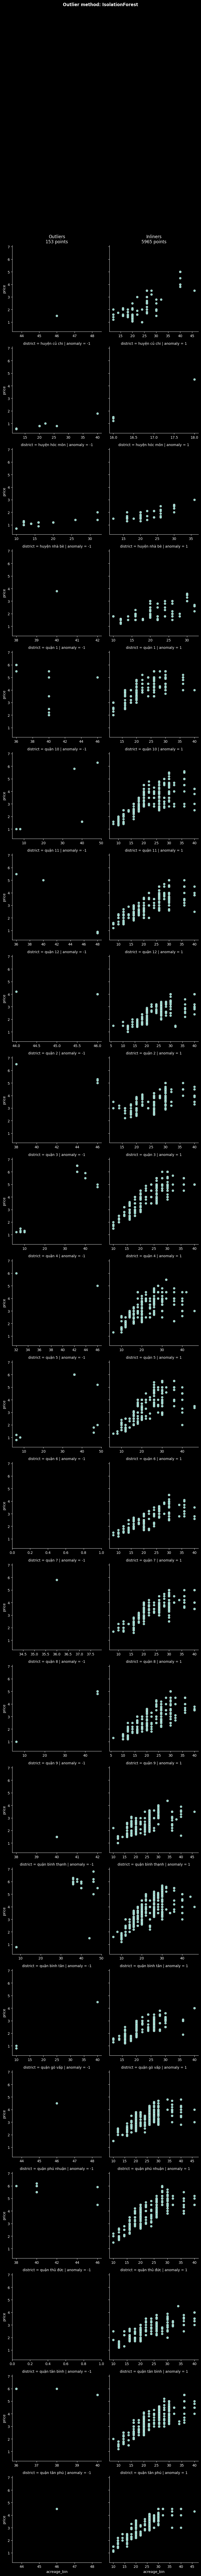

In [234]:
outlier_plot(df7, 'IsolationForest', 'acreage_bin' , 'price' )


### remove Outliners from ISF

In [236]:
df7 = df7[(df7.anomaly==1) & (df7.acreage_bin < 40)]
df7.shape

(5832, 15)

## Price vs Acreage

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 1000x500 with 0 Axes>

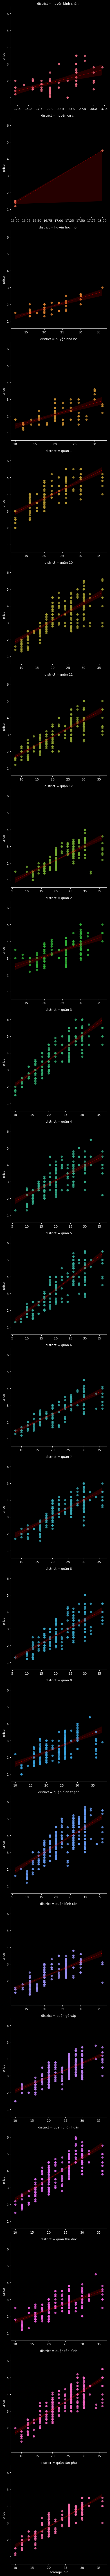

In [237]:
ax = plt.figure(figsize=(10,5))
#[(df5.district=='quận 2')]
sns.lmplot(df7, y='price', x='acreage_bin', line_kws={'color':'r','ls':'--','lw':0.5},
           hue='district', row='district',sharex=False)
# plt.xlim((0,50))

### remove huyện củ chỉ

In [238]:
# df8 = df7[df7.district != 'huyện củ chi']
# print(df7.shape, df8.shape)

(5832, 15) (5827, 15)


## Rename to district

In [304]:
df7.district.unique()

array(['huyện bình chánh', 'huyện củ chi', 'huyện hóc môn',
       'huyện nhà bè', 'quận 1', 'quận 10', 'quận 11', 'quận 12',
       'quận 2', 'quận 3', 'quận 4', 'quận 5', 'quận 6', 'quận 7',
       'quận 8', 'quận 9', 'quận bình thạnh', 'quận bình tân',
       'quận gò vấp', 'quận phú nhuận', 'quận thủ đức', 'quận tân bình',
       'quận tân phú'], dtype=object)

In [305]:
new_name_to_replace = {'huyện bình chánh':'binh chanh', 'huyện củ chi':'cu chi', 'huyện hóc môn':'hoc mon',
       'huyện nhà bè':'nha be', 'quận 1':'district 1', 'quận 10':'district 10', 'quận 11':'district 11', 
       'quận 12':'district 12', 'quận 2':'district 2', 'quận 3':'district 3', 'quận 4':'district 4', 
       'quận 5':'district 5', 'quận 6':'district 6', 'quận 7':'district 7',
       'quận 8':'district 8', 'quận 9':'district 9', 'quận bình thạnh':'binh thanh', 'quận bình tân':'binh tan',
       'quận gò vấp':'go vap', 'quận phú nhuận':'phu nhuan', 'quận thủ đức':'thu duc', 'quận tân bình':'tan binh',
       'quận tân phú':'tan phu'}

# Feature Enginerring

## Label Encoding

In [157]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [296]:
df_fe = df7.copy(deep=True)
df_fe = df_fe[['acreage_bin','price', 'district']]
print(df_fe.shape)
df_fe.head()

(5832, 3)


,acreage_bin,price,district
0,12,1.4,huyện bình chánh
1,12,2.0,huyện bình chánh
2,12,1.2,huyện bình chánh
3,12,1.6,huyện bình chánh
4,12,1.6,huyện bình chánh


In [297]:
print(df_fe.columns)
feature_names = ['acreage_bin', 'district'] + df_fe.district.unique().tolist()
feature_names
# ['a'] + ['b']

Index(['acreage_bin', 'price', 'district'], dtype='object')


['acreage_bin',
 'district',
 'huyện bình chánh',
 'huyện củ chi',
 'huyện hóc môn',
 'huyện nhà bè',
 'quận 1',
 'quận 10',
 'quận 11',
 'quận 12',
 'quận 2',
 'quận 3',
 'quận 4',
 'quận 5',
 'quận 6',
 'quận 7',
 'quận 8',
 'quận 9',
 'quận bình thạnh',
 'quận bình tân',
 'quận gò vấp',
 'quận phú nhuận',
 'quận thủ đức',
 'quận tân bình',
 'quận tân phú']

In [298]:
df_fe.head(5)

,acreage_bin,price,district
0,12,1.4,huyện bình chánh
1,12,2.0,huyện bình chánh
2,12,1.2,huyện bình chánh
3,12,1.6,huyện bình chánh
4,12,1.6,huyện bình chánh


In [299]:
df_fe1 = pd.get_dummies(df_fe, dtype='int',prefix='', prefix_sep='') 
# df_fe1 = df_fe1.drop(['huyện củ chi'],axis=1) # drop one of all dummied columns
df_fe1

,acreage_bin,price,huyện bình chánh,huyện củ chi,huyện hóc môn,huyện nhà bè,quận 1,quận 10,quận 11,quận 12,...,quận 7,quận 8,quận 9,quận bình thạnh,quận bình tân,quận gò vấp,quận phú nhuận,quận thủ đức,quận tân bình,quận tân phú
0,12,1.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,1.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,1.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6107,36,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6108,36,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6109,36,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6110,36,4.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model

In [269]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [300]:
X = df_fe1.drop('price',axis=1)
# X=df6[['acreage']]
y = df_fe1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape)

(4665, 24) (1167, 24)


In [301]:
lr = RandomForestRegressor()

# pipe = Pipeline([
#     ('scaler', RobustScaler()),
#     ('model', lr)
# ])
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.727523998309548

## Hyper parameter tuning

In [270]:
model_params = {
    # 'lr': {
    #     'model': LinearRegression(),
    #     'params': {}
    # },
    'rf': {
        'model': RandomForestRegressor(),
        'params': {
                'n_estimators': [200],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2, 4]
        }
    },
    'xgb' : {
        'model': XGBRegressor(),
        'params': {}
    }
    
}

In [302]:
scores = []
for model, m in model_params.items():

    clf = GridSearchCV(m['model'], m['params'], cv=5)

    clf.fit(X_train,y_train)
    scores.append({
        'model' : model,
        'best score': '{:.10f}'.format(clf.best_score_),
        'best params': clf.best_params_
    })

pd.DataFrame(scores)

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_const

,model,best score,best params
0,lasso,0.3692110553,"{'alpha': 1, 'selection': 'random'}"
1,rf,0.7355628562,"{'max_depth': 20, 'max_features': 'sqrt', 'min..."
2,xgb,0.7346789835,{}


In [287]:
pd.DataFrame(scores).to_csv(path + 'score parameter tuning.csv')

## Model selected

In [291]:
pipe = Pipeline([
    ('model', RandomForestRegressor(n_estimators=200) )
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7491058553751477

In [292]:
def predict_price(district, acreage):
    loc_index = np.where(X.columns == district)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=acreage
    # x[1]=bath
    if loc_index >= 0:
        x[loc_index] = 1
    return pipe.predict([x])[0]

In [277]:
print(predict_price('quận bình thạnh', 25))
print(predict_price('quận 3', 25))
print(predict_price('quận 1', 25))
print(predict_price('quận 7', 25))


3.186642343767345
4.129340393782344
4.278678206515706


c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [293]:
print(predict_price('quận bình thạnh', 25))
print(predict_price('quận 3', 25))
print(predict_price('quận 1', 25))
print(predict_price('quận 7', 25))

3.1745506915470156
4.15173301944014
4.277296921216039
3.5340019466644486


c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

In [294]:
import pickle
with open(path + 'hcm_room_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(pipe,f)

In [295]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open(path + 'columns.json', 'w') as f:
    f.write(json.dumps(columns))